<a href="https://colab.research.google.com/github/riyaz7781/Excel-R-assignments/blob/main/Random_Forest(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

Load the Dataset

In [9]:
data1=pd.read_csv("/content/Fraud_check (1).csv")
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Explorartory Data Analysis

In [11]:
data2=data1.rename({"Marital.Status":"Status","Taxable.Income":"Income","City.Population":"Population","Work.Experience":"WE"},axis=1)
data2

,Undergrad,Status,Income,Population,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [13]:
data2.isna().any()

Undergrad     False
Status        False
Income        False
Population    False
WE            False
Urban         False
dtype: bool

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Undergrad   600 non-null    object
 1   Status      600 non-null    object
 2   Income      600 non-null    int64 
 3   Population  600 non-null    int64 
 4   WE          600 non-null    int64 
 5   Urban       600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [19]:
data3=data2.drop(["Population"],axis=1)
data3

,Undergrad,Status,Income,WE,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


Initialising the Condition

In [28]:
y1=np.empty(600,dtype=object)
i=0
for value in data3["Income"]:
  if value<=30000:
    y1[i]="Risky"
  else:
    y1[i]="Good"
  i+=1

In [29]:
target=pd.DataFrame(y1,columns=["Target"])
target

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [30]:
data4=pd.concat([data3,target],axis=1)
data4

,Undergrad,Status,Income,WE,Urban,Target
0,0,2,68833,10,1,Good
1,1,0,33700,18,1,Good
2,0,1,36925,30,1,Good
3,1,2,50190,15,1,Good
4,0,1,81002,28,0,Good
...,...,...,...,...,...,...
595,1,0,76340,7,1,Good
596,1,0,69967,2,1,Good
597,0,0,47334,0,1,Good
598,1,1,98592,17,0,Good


Label Encoding for Categorical Features

In [32]:
label=LabelEncoder()
data4["Undergrad"]=label.fit_transform(data4["Undergrad"])
data4["Status"]=label.fit_transform(data4["Status"])
data4["Urban"]=label.fit_transform(data4["Urban"])
data4["Target"]=label.fit_transform(data4["Target"])
data4

,Undergrad,Status,Income,WE,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0
...,...,...,...,...,...,...
595,1,0,76340,7,1,0
596,1,0,69967,2,1,0
597,0,0,47334,0,1,0
598,1,1,98592,17,0,0


In [34]:
data4.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

Visualisation

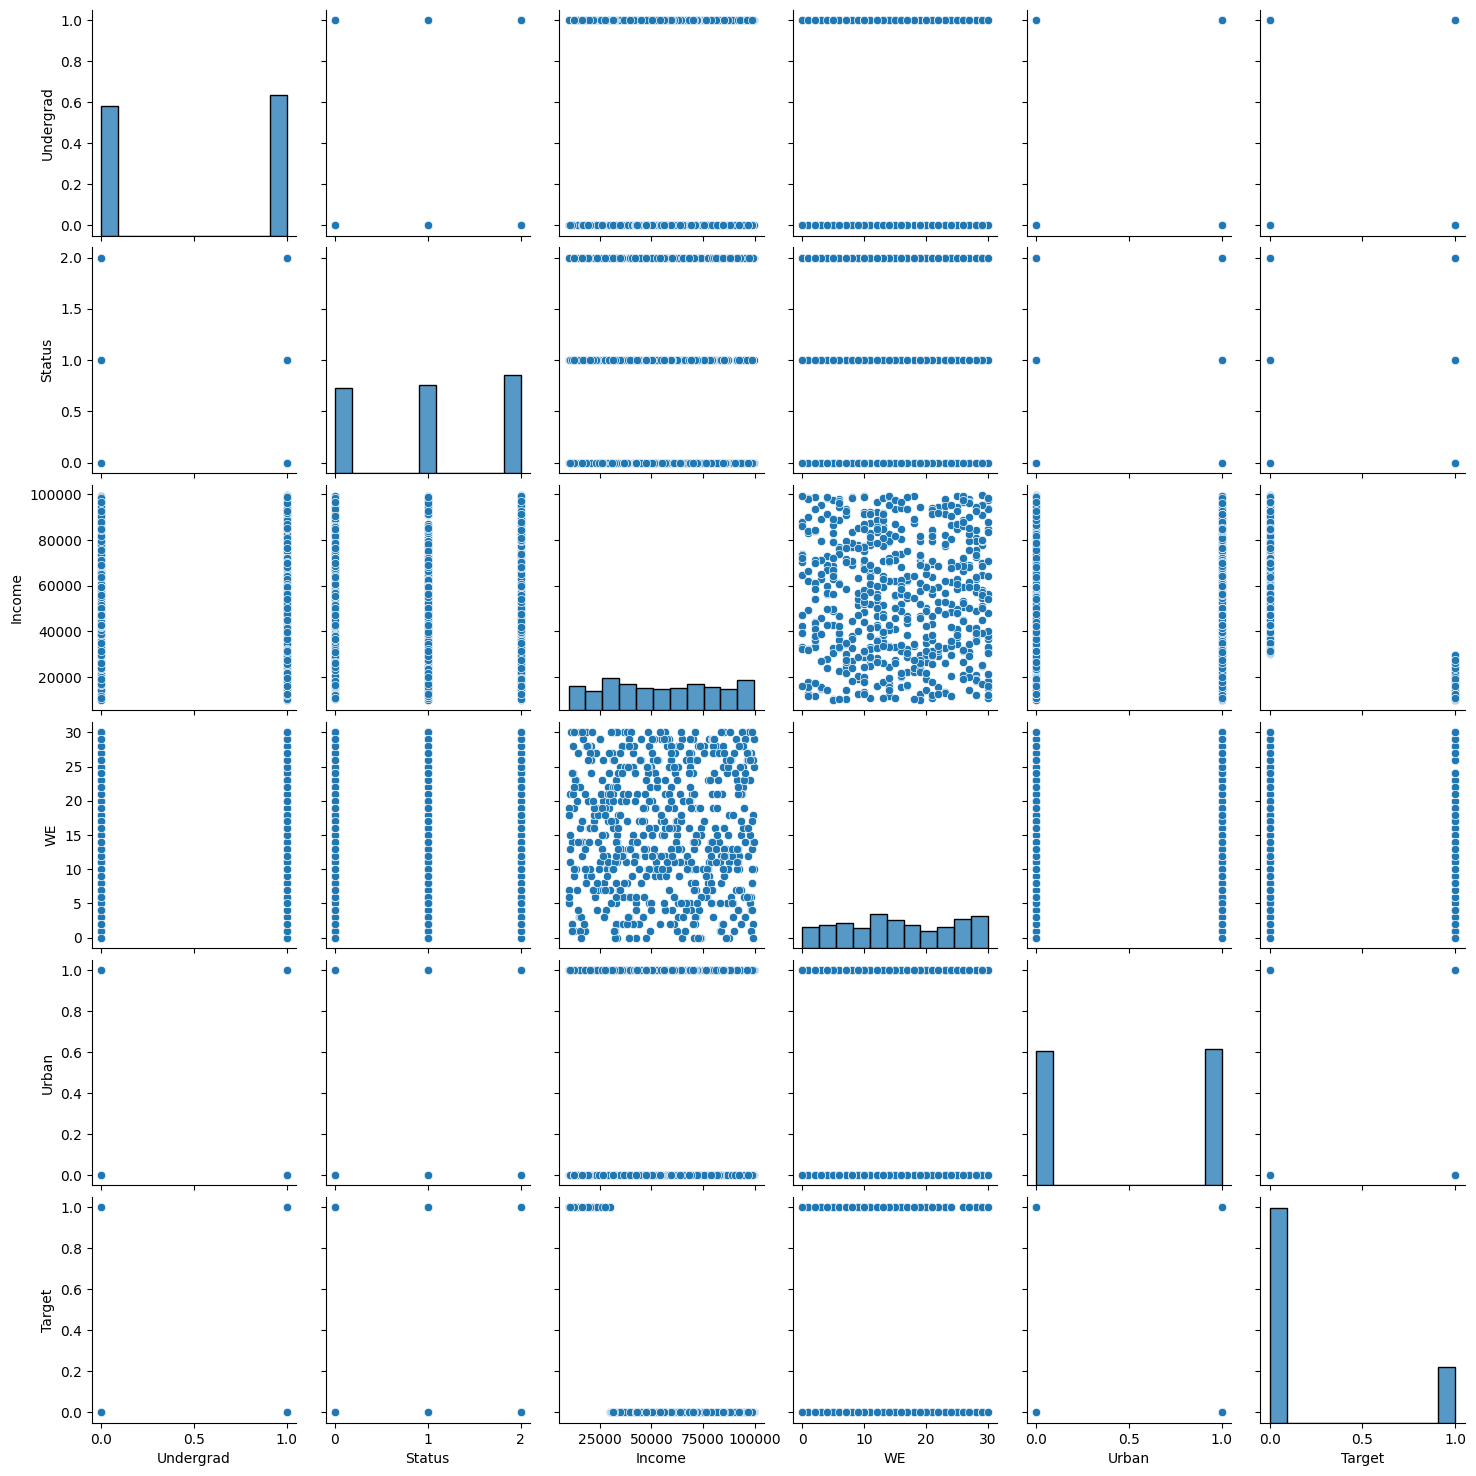

In [35]:
sns.pairplot(data4)

<Axes: xlabel='Income', ylabel='Density'>

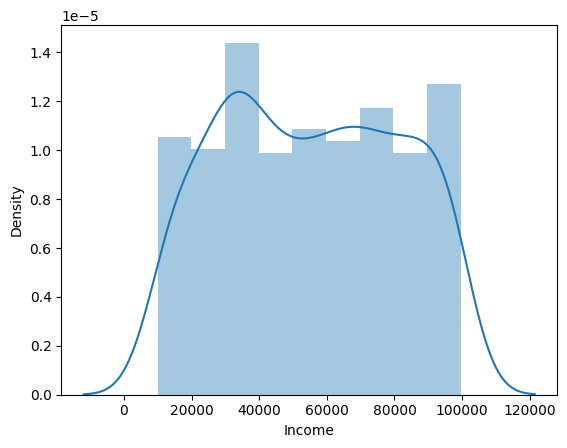

In [36]:
sns.distplot(data4["Income"])

<Axes: xlabel='WE', ylabel='Density'>

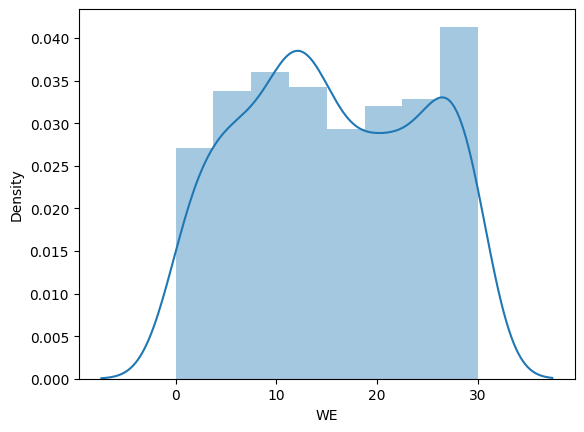

In [37]:
sns.distplot(data4["WE"])

<Axes: >

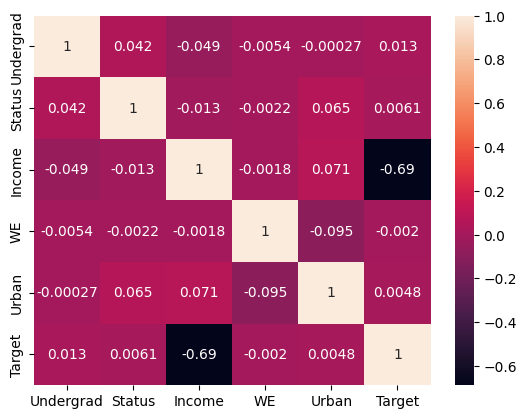

In [38]:
sns.heatmap(data4.corr(),annot=True)

Independent and Dependent values

In [41]:
x=data4.iloc[:,0:5]
y=data4["Target"]
x.head()

,Undergrad,Status,Income,WE,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0


**RANDOM FOREST CLASSIFICATION**

In [44]:
kfold=KFold(n_splits=8,shuffle=True,random_state=42)
model1=RandomForestClassifier(n_estimators=80,max_features=5,max_depth=4)

In [46]:
results=cross_val_score(model1,x,y,cv=kfold)
results.mean()

0.9983333333333333

**RANDOM FOREST REGRESSION**

In [52]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
model2=RandomForestClassifier(n_estimators=65,max_features=7,max_depth=4)

In [53]:
results=cross_val_score(model2,x,y,cv=kfold)
results.mean()

0.9983333333333334